In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,roc_curve,auc,plot_roc_curve
from sklearn.model_selection import cross_val_score

In [ ]:
# 数据读取
train_data = pd.read_excel("/content/drive/MyDrive/DataMining/Churn/churn_train_scale.xlsx")
# train_data = pd.read_excel("/content/drive/MyDrive/DataMining/Churn/churn_training.xlsx")

print(train_data)
test_data = pd.read_excel("/content/drive/MyDrive/DataMining/Churn/churn_test_scale.xlsx")
# test_data = pd.read_excel("/content/drive/MyDrive/DataMining/Churn/churn_test.xlsx")
print(test_data)

      account_length  international_plan  ...  number_customer_service_calls  class
0           0.698242           -0.345245  ...                      -0.443639      0
1          -0.416035            2.896493  ...                       0.341622      0
2          -0.643955            2.896493  ...                       1.126882      0
3           0.444997            2.896493  ...                      -1.228899      0
4           0.419673           -0.345245  ...                      -0.443639      0
...              ...                 ...  ...                            ...    ...
1995       -0.542657           -0.345245  ...                       0.341622      0
1996       -0.821226           -0.345245  ...                       1.126882      0
1997       -1.834205           -0.345245  ...                       0.341622      0
1998        2.116413            2.896493  ...                       0.341622      0
1999       -0.669280           -0.345245  ...                      -1.228899

In [ ]:
# 数据划分
train_x = train_data.iloc[:,:-1]
train_y = train_data.iloc[:,-1]
test_x = test_data.iloc[:,:-1]
test_y = test_data.iloc[:,-1]
print(train_y.shape)
print(test_x.shape)

(2000,)
(1033, 17)


LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
准确率: 0.9196515004840271
精准率: 0.2222222222222222
召回率: 0.37209302325581395
F1率: 0.27826086956521734


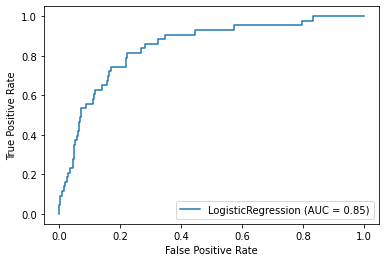

In [ ]:
base_LR = LogisticRegression()
base_LR.fit(train_x,train_y)
base_predict_y = base_LR.predict(test_x)

print(base_LR)
print('准确率:',accuracy_score(test_y,base_predict_y))
print('精准率:',precision_score(test_y,base_predict_y))
print('召回率:',recall_score(test_y,base_predict_y))
print('F1率:',f1_score(test_y,base_predict_y))
print(metrics.plot_roc_curve(base_LR,test_x,test_y))

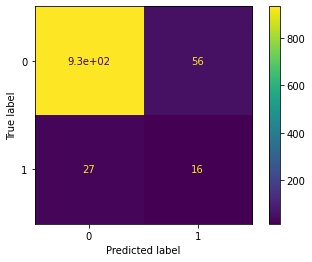

In [ ]:
plot_confusion_matrix(base_LR,test_x,test_y)
plt.savefig('LR_Confusion_Matrix.png',dpi=500)

In [ ]:
# 绘制一下ROC曲线
fpr, tpr, thresholds = metrics.roc_curve(test_y, predict_y, pos_label=1)
print('fpr: {}\n tpr: {}'.format(fpr, tpr))

In [ ]:
param_dict_1 = [
  {
    'C':[1,5,10,50,100,1000],
    'penalty':['l1','l2'],
    'solver':['saga'],
    'multi_class':['auto','ovr','multinomial'],
  },
  {
    'C':[1,5,10,50,100,1000],
    'penalty':['elasticnet'],
    'l1_ratio': [0.5],
    'solver':['saga'],
    'multi_class':['auto','ovr','multinomial'],
  },
  {
    'C':[1,5,10,50,100,1000],
    'penalty':['l1','l2'],
    'solver':['liblinear'],
  },
  {
    'C':[1,5,10,50,100,1000],
    'penalty':['l2'],
    'solver':['lbfgs','newton-cg','sag'],
    'multi_class':['auto','ovr','multinomial'],
  },
]

best_LR = GridSearchCV(LogisticRegression(max_iter=50000),param_dict_1,cv=5,scoring='f1')
best_LR.fit(train_x,train_y)
predict_y = best_LR.predict(test_x)

In [ ]:
print(best_LR.best_params_)
print('准确率:',accuracy_score(test_y,predict_y))
print('精准率:',precision_score(test_y,predict_y))
print('召回率:',recall_score(test_y,predict_y))
print('F1率:',f1_score(test_y,predict_y))
print(metrics.plot_roc_curve(best_LR,test_x,test_y))

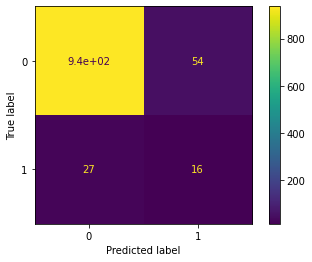

In [ ]:
plot_confusion_matrix(best_LR,test_x,test_y)
plt.savefig('LR_Confusion_Matrix.png',dpi=500)

auc:  0.6577636833450786


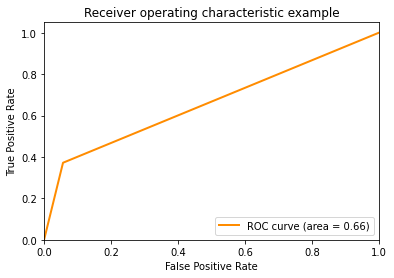

In [ ]:
# 计算AUC
auc = metrics.auc(fpr, tpr)
print('auc: ', auc)
plt.figure()

lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {:.2f})'.format(auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 绘制一下ROC曲线
fpr, tpr, thresholds = metrics.roc_curve(test_y, base_predict_y, pos_label=1)
print('fpr: {}\n tpr: {}'.format(fpr, tpr))

fpr: [0.         0.05656566 1.        ]
 tpr: [0.         0.37209302 1.        ]


In [ ]:
# 输出混淆矩阵
confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print(confusion_matrix)
y_true, y_pred = test_y, best_LR.predict(test_x)
print(metrics.classification_report(y_true, y_pred))

[[936  54]
 [ 27  16]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       990
           1       0.23      0.37      0.28        43

    accuracy                           0.92      1033
   macro avg       0.60      0.66      0.62      1033
weighted avg       0.94      0.92      0.93      1033



auc:  0.6587737843551796


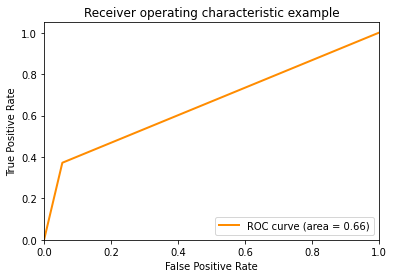

In [ ]:
# 计算AUC
auc = metrics.auc(fpr, tpr)
print('auc: ', auc)
plt.figure()

lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = {:.2f})'.format(auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()